<a href="https://colab.research.google.com/github/Tejasri1610/Climate-Change/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Cleaned_Global_Temperature.csv to Cleaned_Global_Temperature.csv


In [ ]:
temp_df = pd.read_csv("/content/Cleaned_Global_Temperature.csv")
temp_df.columns = ["Year", "Temperature_Anomaly"]

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sealevel_cleaned.csv to sealevel_cleaned.csv


In [ ]:
sea_df = pd.read_csv("/content/sealevel_cleaned.csv")
sea_df.columns = ["Year", "Sea_Level"]
sea_df = sea_df.groupby("Year").mean().reset_index()

In [ ]:
merged_df = pd.merge(temp_df, sea_df, on="Year", how="inner")
years = merged_df["Year"].values


In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(merged_df[["Temperature_Anomaly", "Sea_Level"]])

In [ ]:
def create_sequences(data, seq_length=5):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 5  # Number of years to consider for prediction
X, y = create_sequences(data_scaled, seq_length)


In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 2)),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(2)  # Predicting both Temp Anomaly & Sea Level
])

model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 266ms/step - loss: 0.2778 - val_loss: 0.7496
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2541 - val_loss: 0.6757
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2393 - val_loss: 0.6032
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2136 - val_loss: 0.5118
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1770 - val_loss: 0.4069
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1531 - val_loss: 0.2921
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0843 - val_loss: 0.1781
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0721 - val_loss: 0.0879
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0453 - val_loss: 0.0353
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0290 - val_loss: 0.0080
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0185 - val_loss: 0.0157
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0155 - val_loss: 0.0472


In [ ]:
future_steps = 6  # Predicting till 2030
future_preds = []
last_seq = X[-1]  # Start from last known data

for _ in range(future_steps):
    pred = model.predict(last_seq.reshape(1, seq_length, 2))
    future_preds.append(pred[0])
    last_seq = np.vstack((last_seq[1:], pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [ ]:
future_preds = scaler.inverse_transform(future_preds)
future_years = np.arange(2025, 2025 + future_steps)

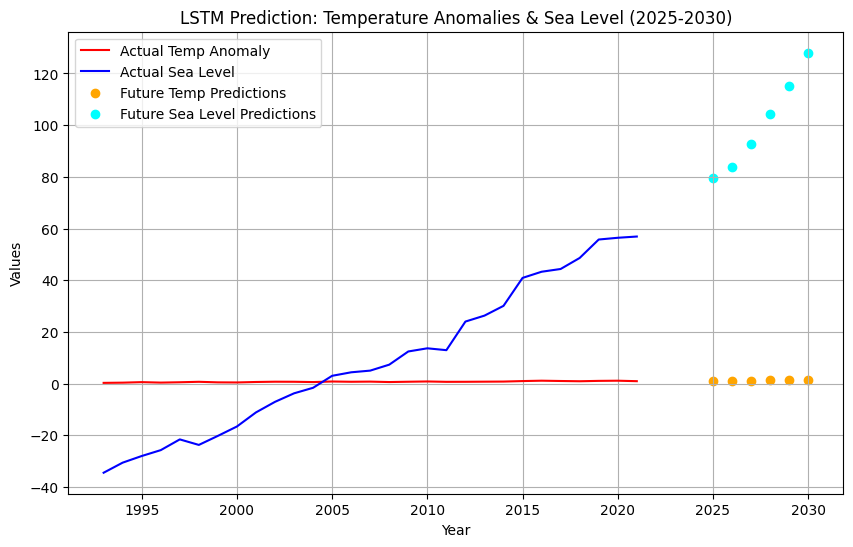

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(years, merged_df["Temperature_Anomaly"], label="Actual Temp Anomaly", color='red')
plt.plot(years, merged_df["Sea_Level"], label="Actual Sea Level", color='blue')
plt.scatter(future_years, future_preds[:, 0], color='orange', label="Future Temp Predictions")
plt.scatter(future_years, future_preds[:, 1], color='cyan', label="Future Sea Level Predictions")
plt.xlabel("Year")
plt.ylabel("Values")
plt.title("LSTM Prediction: Temperature Anomalies & Sea Level (2025-2030)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
temp_df = pd.read_csv("/content/Cleaned_Global_Temperature.csv")
temp_df.columns = ["Year", "Temperature_Anomaly"]

In [ ]:
sea_df = pd.read_csv("/content/sealevel_cleaned.csv")
sea_df.columns = ["Year", "Sea_Level"]
sea_df = sea_df.groupby("Year").mean().reset_index()

In [ ]:
merged_df = pd.merge(temp_df, sea_df, on="Year", how="inner")

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_df[["Temperature_Anomaly", "Sea_Level"]])

In [ ]:
sequence_length = 5  # Using past 5 years to predict the next
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, sequence_length)

In [ ]:
split_idx = int(len(X) * 0.8)
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 2)),
    LSTM(50, return_sequences=False),
    Dense(2)  # Output 2 values: Temperature & Sea Level
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 263ms/step - loss: 0.2751 - val_loss: 0.7486
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2498 - val_loss: 0.6352
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2121 - val_loss: 0.5148
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1610 - val_loss: 0.3819
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1235 - val_loss: 0.2402
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0731 - val_loss: 0.1073
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0317 - val_loss: 0.0193
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0156 - val_loss: 0.0201
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0273 - val_loss: 0.0277
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0322 - val_loss: 0.0128
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0204 - val_loss: 0.0141
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0145 - val_loss: 0.0257


In [ ]:
def predict_values(year):
    last_seq = scaled_data[-sequence_length:]
    future_predictions = []

    for _ in range(year - merged_df['Year'].iloc[-1]):
        pred = model.predict(last_seq.reshape(1, sequence_length, 2))
        future_predictions.append(pred[0])
        last_seq = np.vstack((last_seq[1:], pred))

    return scaler.inverse_transform(future_predictions)[-1]

In [ ]:
while True:
    year_input = input("Enter a year to predict (or type 'exit' to quit): ")
    if year_input.lower() == "exit":
        print("👋 Exiting program. Stay safe! 🌍")
        break
    try:
        year_input = int(year_input)
        temp_anomaly, sea_level_pred = predict_values(year_input)
        print(f"📅 Year: {year_input}")
        print(f"🔥 Predicted Temperature Anomaly: {temp_anomaly:.2f}°C")
        print(f"🌊 Predicted Sea Level Rise: {sea_level_pred:.2f} mm")
    except ValueError:
        print("❌ Invalid input! Please enter a valid year or 'exit'.")

Enter a year to predict (or type 'exit' to quit): 2080
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # ✅ Heatmap Visualization
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
temp_df = pd.read_csv("/content/Cleaned_Global_Temperature.csv")
temp_df.columns = ["Year", "Temperature_Anomaly"]

sea_df = pd.read_csv("/content/sealevel_cleaned.csv")
sea_df.columns = ["Year", "Sea_Level"]
sea_df = sea_df.groupby("Year").mean().reset_index()

In [ ]:
merged_df = pd.merge(temp_df, sea_df, on="Year", how="inner")

# ✅ Normalize Data
scaler_temp = MinMaxScaler()
scaler_sea = MinMaxScaler()

merged_df["Temperature_Anomaly_Norm"] = scaler_temp.fit_transform(merged_df[["Temperature_Anomaly"]])
merged_df["Sea_Level_Norm"] = scaler_sea.fit_transform(merged_df[["Sea_Level"]])

# ✅ Prepare Data for LSTM (Sliding Window of 5 Years)
sequence_length = 5

In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences for LSTM
X_temp, y_temp = create_sequences(merged_df["Temperature_Anomaly_Norm"].values, sequence_length)
X_sea, y_sea = create_sequences(merged_df["Sea_Level_Norm"].values, sequence_length)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


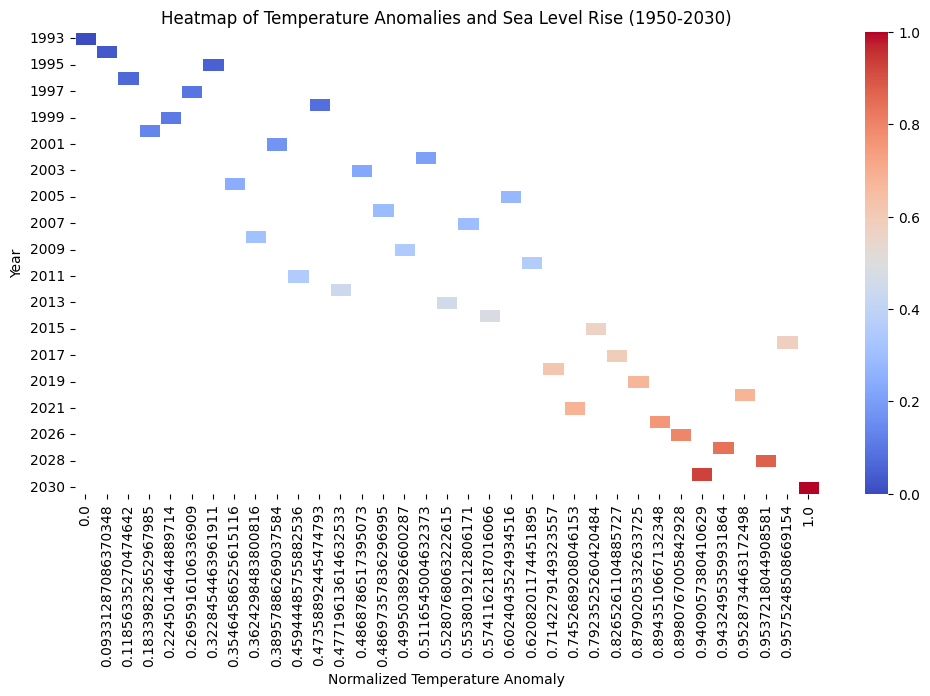

In [ ]:
X_temp = X_temp.reshape(X_temp.shape[0], X_temp.shape[1], 1)
X_sea = X_sea.reshape(X_sea.shape[0], X_sea.shape[1], 1)

# ✅ Build LSTM Models
def build_lstm_model():
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
        LSTM(50, activation='relu'),
        Dense(1)  # Output layer (single prediction)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Train Temperature Model
temp_model = build_lstm_model()
temp_model.fit(X_temp, y_temp, epochs=100, batch_size=8, verbose=0)

# Train Sea Level Model
sea_model = build_lstm_model()
sea_model.fit(X_sea, y_sea, epochs=100, batch_size=8, verbose=0)

# ✅ Predict Future Values (2025-2030)
future_years = np.arange(2025, 2031)
future_temp_pred, future_sea_pred = [], []

last_temp_seq = merged_df["Temperature_Anomaly_Norm"].values[-sequence_length:].reshape(1, sequence_length, 1)
last_sea_seq = merged_df["Sea_Level_Norm"].values[-sequence_length:].reshape(1, sequence_length, 1)

for _ in range(len(future_years)):
    temp_pred = temp_model.predict(last_temp_seq)[0, 0]
    sea_pred = sea_model.predict(last_sea_seq)[0, 0]

    future_temp_pred.append(temp_pred)
    future_sea_pred.append(sea_pred)

    # Update input sequence for next prediction
    last_temp_seq = np.roll(last_temp_seq, -1)
    last_temp_seq[0, -1, 0] = temp_pred

    last_sea_seq = np.roll(last_sea_seq, -1)
    last_sea_seq[0, -1, 0] = sea_pred

# ✅ Denormalize Predictions
future_temp_pred = scaler_temp.inverse_transform(np.array(future_temp_pred).reshape(-1, 1)).flatten()
future_sea_pred = scaler_sea.inverse_transform(np.array(future_sea_pred).reshape(-1, 1)).flatten()

# ✅ Append Predictions to DataFrame
future_df = pd.DataFrame({"Year": future_years, "Temperature_Anomaly": future_temp_pred, "Sea_Level": future_sea_pred})
full_df = pd.concat([merged_df, future_df], ignore_index=True)

# ✅ Normalize Again for Heatmap
full_df["Temp_Norm"] = (full_df["Temperature_Anomaly"] - full_df["Temperature_Anomaly"].min()) / \
                        (full_df["Temperature_Anomaly"].max() - full_df["Temperature_Anomaly"].min())

full_df["Sea_Norm"] = (full_df["Sea_Level"] - full_df["Sea_Level"].min()) / \
                       (full_df["Sea_Level"].max() - full_df["Sea_Level"].min())

# ✅ Create Pivot Table for Heatmap (Fixed)
heatmap_data = full_df.pivot(index="Year", columns="Temp_Norm", values="Sea_Norm")
# ✅ Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Heatmap of Temperature Anomalies and Sea Level Rise (1950-2030)")
plt.xlabel("Normalized Temperature Anomaly")
plt.ylabel("Year")
plt.show()